<a href="https://colab.research.google.com/github/Avishek2020/Data_science_learning/blob/main/Predictive_Maintainence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Settings for synthetic data
number_of_days = 365  # Number of days of data
start_date = pd.to_datetime('2023-01-01')  # Start date of data
initial_cycle_time = 5.0  # Initial average cycle time in hours
cycle_time_increase = 0.01  # Daily increase in cycle time to simulate wear and tear

# Generate date range
dates = pd.date_range(start=start_date, periods=number_of_days)

# Simulate daily cycle time increase due to wear and tear
cycle_times = initial_cycle_time + np.arange(number_of_days) * cycle_time_increase

# Add random noise to cycle times to simulate daily variations
cycle_times += np.random.normal(loc=0, scale=0.1, size=number_of_days)

# Create DataFrame
data = pd.DataFrame({'date': dates, 'cycle_time': cycle_times})

# Save to CSV
data.to_csv('sample_maintenance_data.csv', index=False)

print("Sample dataset generated and saved as 'sample_maintenance_data.csv'.")


Sample dataset generated and saved as 'sample_maintenance_data.csv'.


In [ ]:
(data['date'] - data['date'].min())#.dt.days


0       0 days
1       1 days
2       2 days
3       3 days
4       4 days
        ...   
360   360 days
361   361 days
362   362 days
363   363 days
364   364 days
Name: date, Length: 365, dtype: timedelta64[ns]

In [ ]:
data.head(6)

,date,cycle_time,days_since_start
0,2023-01-01,4.928828,0
1,2023-01-02,5.014333,1
2,2023-01-03,5.002500,2
3,2023-01-04,4.999549,3
4,2023-01-05,5.080616,4
5,2023-01-06,4.996848,5


from matplotlib import pyplot as plt
_df_0['cycle_time'].plot(kind='hist', bins=20, title='cycle_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['days_since_start'].plot(kind='hist', bins=20, title='days_since_start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='cycle_time', y='days_since_start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cycle_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cycle_time'}, axis=1)
              .sort_values('cycle_time', ascending=True))
  xs = counted['cycle_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('cycle_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cycle_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['days_since_start']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'days_since_start'}, axis=1)
              .sort_values('days_since_start', ascending=True))
  xs = counted['days_since_start']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('days_since_start', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('days_since_start')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['cycle_time'].plot(kind='line', figsize=(8, 4), title='cycle_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['days_since_start'].plot(kind='line', figsize=(8, 4), title='days_since_start')
plt.gca().spines[['top', 'right']].set_visible(False)

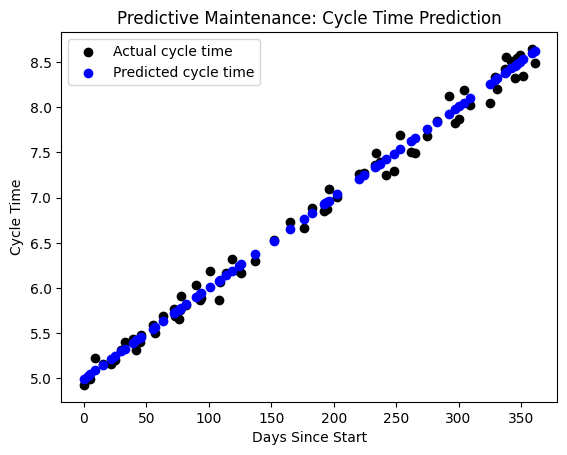

Predicted cycle time in 30 days: 8.951630602098236


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample code to predict maintenance needs based on machine cycle times

# Step 1: Load the data
# Assume your dataset is a CSV file with columns 'date' and 'cycle_time'
# Replace 'your_dataset.csv' with the path to your actual data file
data = pd.read_csv('/content/sample_maintenance_data.csv')
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is datetime type
data.sort_values('date', inplace=True)  # Sort data by date

# Step 2: Feature Engineering
# Convert 'date' into a numerical feature for modeling
data['days_since_start'] = (data['date'] - data['date'].min()).dt.days

# Step 3: Prepare data for model
X = data[['days_since_start']]  # Feature matrix
y = data['cycle_time']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict cycle times on the testing set
y_pred = model.predict(X_test)

# Step 5: Analyze the predictions
# Plot actual vs. predicted cycle times to visualize model performance
plt.scatter(X_test, y_test, color='black', label='Actual cycle time')
plt.scatter(X_test, y_pred, color='blue', label='Predicted cycle time')
#plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted cycle time')
plt.xlabel('Days Since Start')
plt.ylabel('Cycle Time')
plt.title('Predictive Maintenance: Cycle Time Prediction')
plt.legend()
plt.show()

# Step 6: Predict future cycle times and determine maintenance need
# Example: Predict cycle time 30 days from the last recorded day
future_day = data['days_since_start'].max() + 30
future_pred = model.predict([[future_day]])
print(f"Predicted cycle time in 30 days: {future_pred[0]}")

# Here you can implement logic to decide if maintenance is needed based on the prediction
# For example, if future_pred significantly exceeds the average cycle time, schedule maintenance


In [ ]:
dffinal=y_test.to_frame()
dffinal["Predicted"] = y_pred
dffinal

,cycle_time,Predicted
193,6.910877,6.935014
33,5.398883,5.329747
15,5.162801,5.149154
309,8.025786,8.098832
57,5.503914,5.570537
...,...,...
203,7.007900,7.035343
82,5.817081,5.821360
94,5.885781,5.941755
192,6.856831,6.924981


In [ ]:
import numpy as np
import pandas as pd

# Settings for the synthetic dataset
num_samples = 1000  # Number of data samples

# Random seed for reproducibility
np.random.seed(42)

# Generating synthetic sensor data
temperature = np.random.normal(loc=50, scale=10, size=num_samples)  # Average temperature with some noise
vibration = np.random.normal(loc=0.5, scale=0.1, size=num_samples)  # Average vibration level with some noise
pressure = np.random.normal(loc=10, scale=2, size=num_samples)  # Average pressure with some noise

# Generating failure events based loosely on sensor readings
# Let's assume higher temperature and vibration increase the likelihood of failure
failure = []
for temp, vib in zip(temperature, vibration):
    # Simple logic to determine failure: higher temperature and vibration increase failure chance
    failure_chance = 0.01  # Base failure chance
    if temp > 60:  # Increasing failure chance if temperature is high
        failure_chance += 0.05
    if vib > 0.6:  # Increasing failure chance if vibration is high
        failure_chance += 0.05

    # Determining if failure occurs
    failure.append(1 if np.random.random() < failure_chance else 0)

# Creating a DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'vibration': vibration,
    'pressure': pressure,
    'failure': failure
})

# Save to CSV
data.to_csv('equipment_sensor_data.csv', index=False)

print("Sample dataset generated and saved as 'equipment_sensor_data.csv'.")


Sample dataset generated and saved as 'equipment_sensor_data.csv'.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/equipment_sensor_data.csv')

# Data preprocessing
# Assume the dataset has columns like 'temperature', 'vibration', 'pressure', and 'failure'
features = data[['temperature', 'vibration', 'pressure']]
target = data['failure']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
dffinal=y_test.to_frame()
dffinal["Predicted"] = predictions
dffinal.tail(20)

,failure,Predicted
494,0,0
670,0,0
377,0,0
526,0,0
845,0,0
137,0,0
355,0,0
365,0,0
942,0,0
749,1,0


In [ ]:

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Feature Importance for Recommendation
feature_importances = pd.Series(model.feature_importances_, index=['temperature', 'vibration', 'pressure']).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)


Confusion Matrix:
[[194   0]
 [  6   0]]

Feature Importances:
 vibration      0.360795
temperature    0.325379
pressure       0.313825
dtype: float64


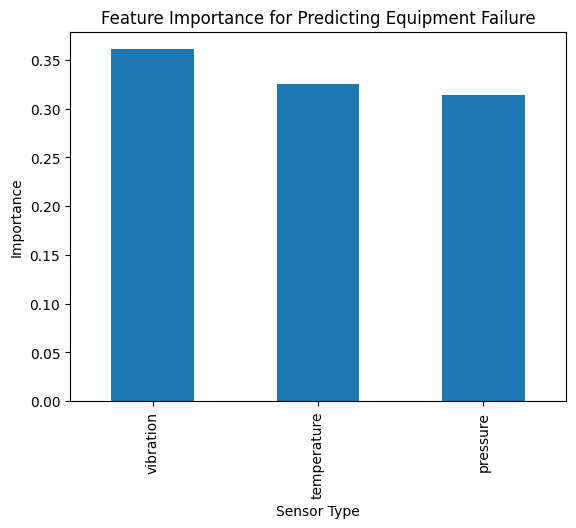

In [ ]:

# Plotting feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Predicting Equipment Failure')
plt.ylabel('Importance')
plt.xlabel('Sensor Type')
plt.show()